In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(style='ticks')

In [253]:
data = pd.read_csv('titanic.csv')
games = pd.read_csv('vgsales.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Проверим набор данных пассажиров Титаника на наличие пропусков данных  

In [170]:
for col in data.columns:
    count = data[data[col].isnull()].shape[0]
    print('{}  -  {}'.format(col, count))
print ('{} - размер датасета'.format(data.shape))

PassengerId  -  0
Survived  -  0
Pclass  -  0
Name  -  0
Sex  -  0
Age  -  177
SibSp  -  0
Parch  -  0
Ticket  -  0
Fare  -  0
Cabin  -  687
Embarked  -  2
(891, 12) - размер датасета


 Можно заметить, что пропущены 177 значений столбца Age, 2 значения столбца Embarked и целых 687 значений столбца Cabin.  Исходя из полученных данных целесообразным будет полное удаление столбца Cabin. Для столбцов Age и Embarked следует удалить строки с пропущенными значениями

In [171]:
del data['Cabin']
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


После удаления столбца Cabin воспользуемся методом dropna() для удаления строк, содержащих пропуски данных

In [172]:
data_ = data.dropna(axis=0, how='any')
(data.shape, data_.shape)

((891, 11), (712, 11))

In [173]:
data_.dropna(inplace=True)
data_.reset_index(drop=True, inplace=True)
data_

c:\users\timofey\virtln\mmo\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
707,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
708,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Можно заметить, что размер набора данных уменьшился на 179 строк.

### В исходном наборе данных присутствуют категориальные признаки, которые необходимо преобразовать в числовые 

Узнаем количество уникальных значений каждого категориального признака 

In [175]:
print ('{} - {}'.format(data_['Sex'].unique(), data_['Embarked'].unique()))

['male' 'female'] - ['S' 'C' 'Q']


In [176]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder()
ohe = OneHotEncoder()

Воспользуемся двумя методами кодирования: Label encoding и One-hot encoding. Признак Sex закодируем первым методом, а признак Embarked - вторым 

In [177]:
sex = le.fit_transform(data_['Sex'])
np.unique(sex)

array([0, 1])

In [178]:
sex

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [83]:
sex = pd.DataFrame({'Sex':sex.T})
sex

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
707,0
708,1
709,0
710,1


Удалим столбец Sex, в исходном наборе данных и заменим его на новый с числовыми значениями 

In [84]:
del data_['Sex']
data_j1 = data_.join(sex)
data_j1


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
707,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,Q,0
708,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,S,1
709,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,S,0
710,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C,1


Метод One-Hot Encoding

In [215]:
cat_data = data_j1['Embarked']

In [216]:
cat_enc = pd.DataFrame({'Embarked':cat_data.T})
cat_enc

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
707,Q
708,S
709,S
710,C


In [217]:
cat_enc.shape

(712, 1)

In [218]:
embarked = ohe.fit_transform(cat_enc[['Embarked']])

In [219]:
ohe.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [220]:
embarked.todense()[0:5]

matrix([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])

In [221]:
embarked.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [222]:
e = embarked.transpose()
e.toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.]])

In [223]:
e0 = e[0].toarray()
e0

array([[0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 

In [224]:
e1 = e[1].toarray()
e2 = e[2].toarray()


In [225]:
data_j2 = pd.DataFrame({'E1':e0[0],'E2':e1[0],'E3':e2[0]})
data_j2

,E1,E2,E3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
707,0.0,1.0,0.0
708,0.0,0.0,1.0
709,0.0,0.0,1.0
710,1.0,0.0,0.0


In [231]:
data_j2.dtypes

E1    float64
E2    float64
E3    float64
dtype: object

Изменим тип признаков датафрейма на с float64 на int

In [237]:
data_j2['E1'] = data_j2['E1'].astype('int')
data_j2['E2'] = data_j2['E2'].astype('int')
data_j2['E3'] = data_j2['E3'].astype('int')

In [238]:
data_j2

,E1,E2,E3
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
707,0,1,0
708,0,0,1
709,0,0,1
710,1,0,0


Объединим датафреймы

In [239]:
del data_j1['Embarked']
new_data = data_j1.join(data_j2)
new_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex,E1,E2,E3
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,0,0,1,0
708,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,0,1
709,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,0,1
710,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,1,0,0


Также возможно использование быстрого варианта one-hot кодирования с помощью pandas get_dummies()

In [229]:
pd.get_dummies(cat_enc)


,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
707,0,1,0
708,0,0,1
709,0,0,1
710,1,0,0


### Масштабирование 

In [240]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

##### MinMax масштабирование

In [241]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(new_data[['Fare']])

In [246]:
print(new_data['Fare'].mean())

34.567251404494385


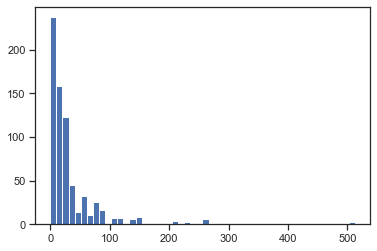

In [243]:
plt.hist(new_data['Fare'], 50)
plt.show()

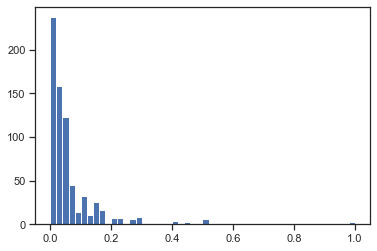

In [247]:
plt.hist(sc1_data, 50)
plt.show()

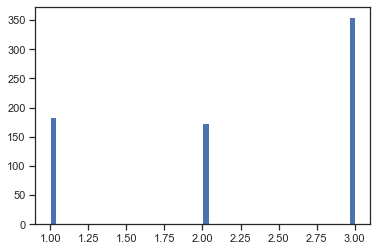

In [250]:
plt.hist(new_data['Pclass'], 50)
plt.show()

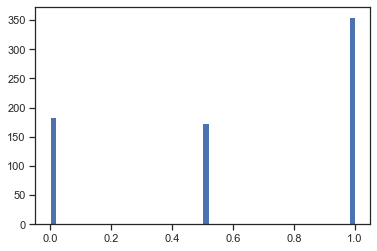

In [252]:
sc11 = MinMaxScaler()
sc11_data = sc1.fit_transform(new_data[['Pclass']])
plt.hist(sc11_data, 50)
plt.show()

##### Масштабирование данных на основе Z-оценки

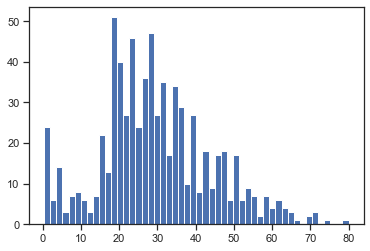

In [249]:
plt.hist(new_data['Age'], 50)
plt.show()

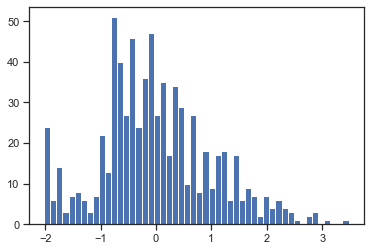

In [248]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(new_data[['Age']])
plt.hist(sc2_data, 50)
plt.show()

## Дополнительно поработаем со вторым набором данных о видеоиграх

In [257]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Проверим набор данных видеоигр на наличие пропусков данных  

In [267]:
for co in games.columns:
    counter = games[games[co].isnull()].shape[0]
    print('{}  -  {}'.format(co, counter))
print ('{} - размер датасета'.format(games.shape))

Rank  -  0
Name  -  0
Platform  -  0
Year  -  271
Genre  -  0
Publisher  -  58
NA_Sales  -  0
EU_Sales  -  0
JP_Sales  -  0
Other_Sales  -  0
Global_Sales  -  0
(16598, 11) - размер датасета


In [272]:
games['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

### Проведем импьютацию пропущенных значений

In [274]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
data_imput = games['Year']
data_imput

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16598, dtype: float64

In [275]:
data_imput = pd.DataFrame({'Year':data_imput.T})
data_imput

,Year
0,2006.0
1,1985.0
2,2008.0
3,2009.0
4,1996.0
...,...
16593,2002.0
16594,2003.0
16595,2008.0
16596,2010.0


In [276]:
data_imput.shape

(16598, 1)

In [277]:
indicator = MissingIndicator()
missing_value = indicator.fit_transform(data_imput)
missing_value

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [278]:
strategies=['mean', 'median','most_frequent']

In [279]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_imput)
    return data_num_imp[missing_value]

In [285]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    missing_value = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[missing_value]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [284]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 20

In [287]:
test_num_impute_col(data_imput,'Year', strategies[0])

('Year', 'mean', 271, 2006.4064433147546, 2006.4064433147546)

In [288]:
test_num_impute_col(data_imput,'Year', strategies[1])

('Year', 'median', 271, 2007.0, 2007.0)

In [289]:
test_num_impute_col(data_imput,'Year', strategies[2])

('Year', 'most_frequent', 271, 2009.0, 2009.0)